# Aprendizaje no supervisado

¿Qué pasa cuando no tenemos etiquetas para poder entrenar un modelo?


Clustering (partitioning / hierarchical):
* k-means
* DBSCAN

Density Estimation:
* Histograms
* Kernel Density Estimation
* Gaussian Mixture Models 




## Clustering

La idea es encontrar un conjunto de elementos, en el cual los de elementos dentro de éste sean similares entre sí y diferentes a los elementos provenientes de otros conjuntos.
 

<img src = "data6/Clustering1.png" /> 

<img src = "data6/Clustering2.png" />

* Partitioning Clustering

<img src = "data6/PartitionClustering.png" />

* Hierarchical Clustering

<img src = "data6/HierarchicalClustering.png" />



### K-means

* Dividir los objetos en k cluster.
* Cada cluster es descrito por un centroide.
* Cada objeto es asociado al centroide más cercano

<img src = data6/Kmeans0.png />

¿Cómo se definen los centroides?
ALGORITMO:

* Elegir centroides iniciales aleatoriamente
* Los cluster dependen de los centroides iniciales.
* Aleatoriamente elegir un nuevo objeto y asociarlo al centroide más cercano.
* Los centoides son re-definidos como la media de los objetos dentro del cluster
* La convergencia de alcanza cuando los cluster ya no cambien.

<img src = data6/Kmeans1.png /><img src = data6/Kmeans2.png /><img src = data6/Kmeans3.png /><img src = data6/Kmeans4.png /><img src = data6/Kmeans0.png />

#### Opciones de inicialización:

* Posiciones aleatorias
* Datos aleatorios como centroides


#### K-means
* Garantiza la convergencia.
* Los resultados dependen de la inicialización.
* El número de cluster es importante.
* Sencible a outliers
  *   * Una posible solución es utilizar la mediana en vez de la media.

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

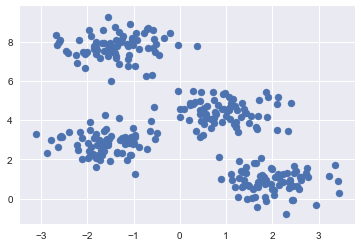

In [51]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50)

In [52]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

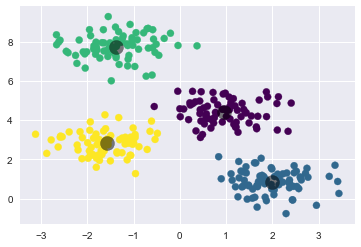

In [53]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

# k-Means: Expectation–Maximization

Aleatoriamente escoger centroides
Hasta la convergencia:
* E-Step: Asignar puntos al cluster más cercano.
* M-Step: Ajustar el centroide a la media de los puntos pertenecientes al cluster.

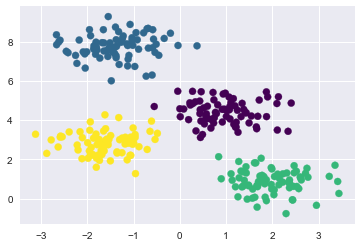

In [54]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # Elegir centroides iniciales aleatoriamente
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]
    
    while True:
        #  Asignar etiqueta basandose en el centroide más cercano
        labels = pairwise_distances_argmin(X, centers)
        
        # Encontrar nuevo centro con el nuevo punto
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        
        # Chequeo de convergencia
        if np.all(centers == new_centers):
            break
        centers = new_centers
    
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')

### Problemas de K-means:
1. No se asegura alcanzar el óptimo global. Los resultados de los cluster finales dependen de la inicialización del algoritmo (depende de la inicialización).
2. El número de clusters debe ser definido a priori. 
3. Está limitado a limites de decisión linealmente separables.
4. El algoritmo se vuelve muy lento con un volumen de datos muy grande (hay que calcular de la distancia de todos los m puntos a los k clusters).

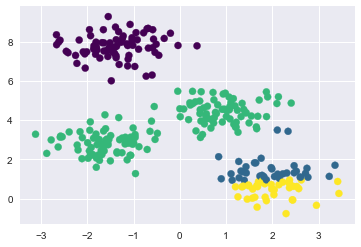

In [55]:
centers, labels = find_clusters(X, 4, rseed=0)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')

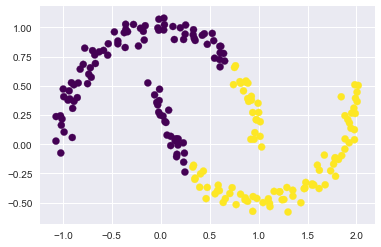

In [56]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis')
#aplicar una transformación lineal o no lineal para poder descubrir la relación latente

# Clustering Jerárquico:

**Aglomerativo**: En cada iteración se mezclan los pares más cercanos entre cluster.

Para esto debemos definir proximidad: 

<img src=data6/Agglom_prox.png />

**Algoritmo**

* Calcular matriz de proximidad
* **repetir**
* * Mezclar los dos cluster más cercanos
* * Actualizar la matriz de proximidad para reflejar la creación de los nuevos cluster
* * Update the proximity matrix to reflect the proximity between the new cluster and the original clusters.
* **Convergencia** Cuando sólo queda un cluster.


<img src=data6/Agglom1.png />

**Matriz de proximidad** <img src=data6/Agglom_table.png />

<img src=data6/Agglom2.png />
___
<img src=data6/Agglom3.png />
___
<img src=data6/Agglom4.png />
___
<img src=data6/Agglom5.png />
___
<img src=data6/Agglom6.png />

**Dendograma**
<img src=data6/Agglom_dendogram.png/>


# ¿Cómo evaluamos un cluster?

* Cohesión (Distancia media entre los objetos dentro de un cluster):

  SSE$_i =\sum_{\mathbf{x}\in C_i}\mathrm{dist}(\boldsymbol{c}_i, \boldsymbol{x})^2=\frac{1}{2N_i}\sum_{\mathbf{x}\in C_i}\sum_{\mathbf{y}\in C_i}\mathrm{dist}(\boldsymbol{x}, \boldsymbol{y})^2$

* Separación (Distancia media minima hacia objetos dentro de otros cluster)
  
  SSB$= \sum_{i=1}^KN_i\mathrm{dist}(\boldsymbol{c}_i, \boldsymbol{c})^2= \frac{1}{2K}\sum_{i=1}^K\sum_{j=1}^KN_i\mathrm{dist}(\boldsymbol{c}_i, \boldsymbol{c}_j)^2$
  
#### Silhouette Coefficient

* $a$: Cohesión
* $b$: Separación
* $s = \frac{b - a}{\max (a, b)}$

Queremos que $s$ sea posibitivo ($a < b$) y cercano a 1 ($a$ pequeño).




       u_mag      g_mag      r_mag      i_mag      z_mag
0  20.533161  17.968030  16.827314  16.373095  16.091063
1  18.894476  17.674576  17.208895  17.033516  16.972940
2  18.290901  17.022612  16.625498  16.431305  16.399673
3  19.784182  17.820679  17.003235  16.721306  16.541569
4  18.874607  17.638632  17.120625  16.907972  16.849592


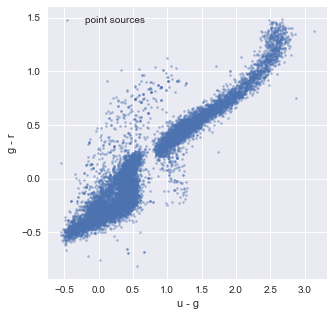

In [57]:
import pandas as pd
df = pd.read_csv("data6/SDSS_PS_Unsup.csv")
print df.head()
colors = np.array([df["u_mag"] - df["g_mag"], df["g_mag"] - df["r_mag"]])

def Plot2DMags (colors):
    plt.plot (colors[0], colors[1], ".", markersize=5, label = "point sources", alpha = 0.5)

    plt.xlabel ('u - g')
    plt.ylabel ('g - r')
    plt.legend (loc = "upper left")


plt.clf()
plt.figure(figsize = (5, 5))
Plot2DMags (colors)
plt.show()
plt.close()

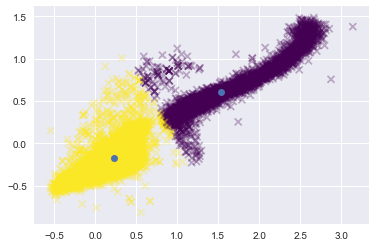

In [58]:
km = KMeans(n_clusters=2)

km.fit(colors.transpose())

labels = km.labels_

plt.clf()
plt.scatter(colors[0], colors[1], c=labels.astype(np.float), marker = "x", alpha = 0.3, cmap='viridis')
plt.plot (km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], "o")
plt.show()


n =  2 , silhouette =  0.665438650543156


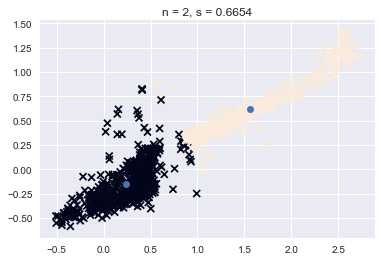

n =  3 , silhouette =  0.6404777826977412


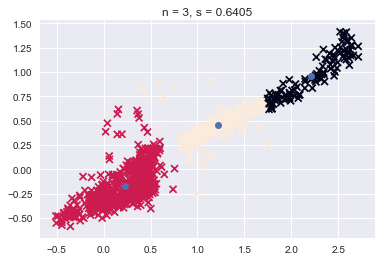

n =  4 , silhouette =  0.5317581845320635


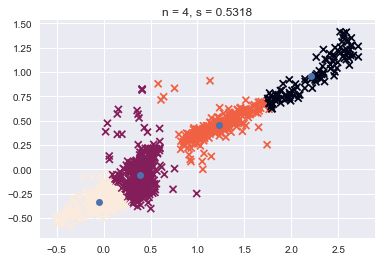

n =  10 , silhouette =  0.43805213117368624


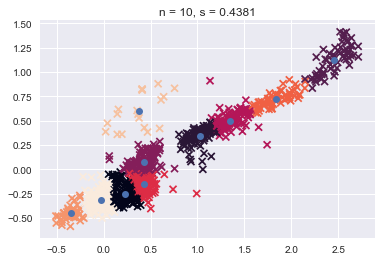

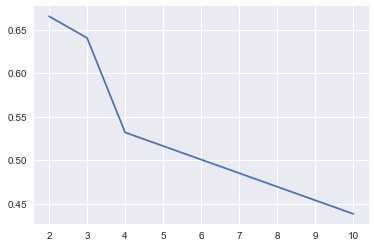

In [59]:
from sklearn import metrics

N_small = 1000
#np.random.shuffle(np.array(colors).transpose())
colors_sm = colors[:, np.random.choice (np.arange(colors.shape[1]), N_small)][:, :N_small]

ns = [2, 3, 4, 10]
ss = []
for n in ns:
    km = KMeans(n_clusters=n)
    km.fit(np.array(colors_sm).transpose())

    labels = km.labels_
    ss.append (metrics.silhouette_score(np.array(colors_sm).transpose(), labels))
    print "n = ", n, ", silhouette = ", ss[-1]
    
    plt.clf()
    plt.scatter(colors_sm[0], colors_sm[1], c=labels.astype(np.float), marker = "x")
    plt.plot (km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], "o")
    plt.title ("n = " + str(n) + ", s = " + str(np.round(ss[-1], 4)))
    plt.show()

plt.plot ()
plt.plot (ns, ss)
plt.show()

427 640 3


/Users/ma.ignacioperezc/anaconda2/lib/python2.7/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]
/Users/ma.ignacioperezc/anaconda2/lib/python2.7/site-packages/sklearn/datasets/base.py:762: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  images = [imread(filename) for filename in filenames]


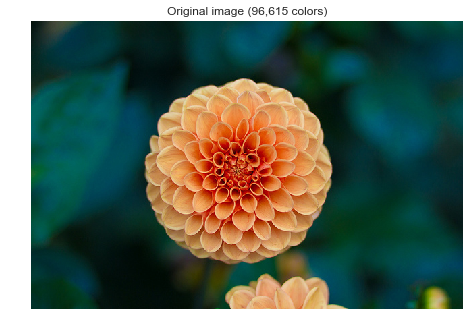

In [60]:
from sklearn.datasets import load_sample_image

image = load_sample_image("flower.jpg")#[160:170, 185:195]

# Load Image and transform to a 2D numpy array.
w, h, d = original_shape = tuple(image.shape)
print w, h, d

# Display all results, alongside original image
plt.figure(1)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(image)

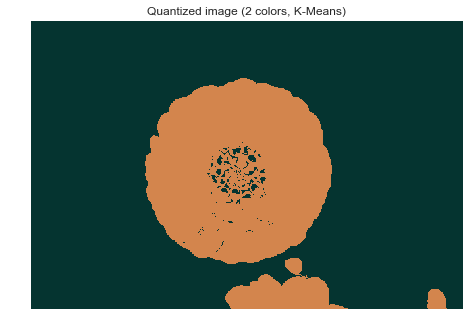

In [61]:
image_array = np.reshape(image, (w * h, d))
n_colors = 2
km = KMeans(n_clusters=n_colors, random_state=0)

from sklearn.utils import shuffle
image_array_sample = shuffle(image_array, random_state=0)[:1000]
km.fit(image_array_sample)

labels = km.predict(image_array)

def recreate_image(codebook, labels, w, h):
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

#print km.cluster_centers_
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (' + str(n_colors) + ' colors, K-Means)')
plt.imshow(recreate_image(km.cluster_centers_, labels, w, h).astype("B"))

# Principal Components

## PCA for data visualization

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Load Iris Dataset

In [2]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [3]:
# loading dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [4]:
df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Standardize the Data

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

In [5]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
x = df.loc[:, features].values

In [6]:
y = df.loc[:,['target']].values

In [7]:
x = StandardScaler().fit_transform(x)

In [8]:
pd.DataFrame(data = x, columns = features).head()

,sepal length,sepal width,petal length,petal width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


## PCA Projection to 2D

In [9]:
pca = PCA(n_components=2)

In [10]:
principalComponents = pca.fit_transform(x)

In [11]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [12]:
principalDf.head(5)

,principal component 1,principal component 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


In [13]:
df[['target']].head()

,target
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [14]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


## Visualize 2D Projection

Use a PCA projection to 2d to visualize the entire data set. You should plot different classes using different colors or shapes. Do the classes seem well-separated from each other? 

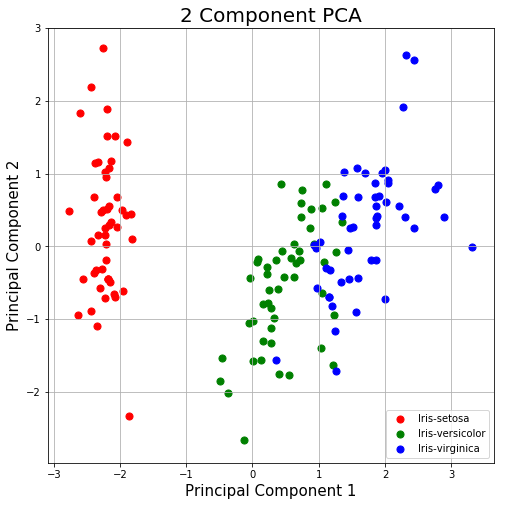

In [16]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

The three classes appear to be well separated! 

iris-virginica and iris-versicolor could be better separated, but still good!

## Explained Variance

The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [17]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

Together, the first two principal components contain 95.80% of the information. The first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. The third and fourth principal component contained the rest of the variance of the dataset. 

## What are other applications of PCA (other than visualizing data)?

If your learning algorithm is too slow because the input dimension is too high, then using PCA to speed it up is a reasonable choice. (<b>most common application in my opinion</b>). We will see this in the MNIST dataset. 

If memory or disk space is limited, PCA allows you to save space in exchange for losing a little of the data's information. This can be a reasonable tradeoff.

## What are the limitations of PCA? 

- PCA is not scale invariant. check: we need to scale our data first. 
- The directions with largest variance are assumed to be of the most interest 
- Only considers orthogonal transformations (rotations) of the original variables 
- PCA is only based on the mean vector and covariance matrix. Some distributions (multivariate normal) are characterized by this, but some are not. 
- If the variables are correlated, PCA can achieve dimension reduction. If not, PCA just orders them according to their variances. 